<a href="https://colab.research.google.com/github/matheusbuenowb/Data-Mining-Bee-Colony/blob/main/Atividade_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Bees are essential to the environmental structure of our world, as well as sustaining humanity. Not only are they part of the food chain, they also pollinate as both specialist and generalists. 1/3 of our food source depends on bee pollination. Thus, humans must take more actions to protect these vital insects.
- BeeAudio Dataset is an initiative to encourage computational means of addressing bee population decline, such as through creating machine learning algorithms to remotely and instantly detect the health status of the hive via sound data. This is the largest single dataset of bee audio, alongside multi-dimensional data, and it was all collected with a custom IoT device combining an ESP32 Wi-Fi module, INMP441 microphone module, and a BME280 temperature/humidity sensor.
- All data is original from European Honey Bee hives in California, and it is split in 60 second chunks. There are 7100 samples in total.

link: https://www.kaggle.com/datasets/annajyang/beehive-sounds?select=all_data_updated.csv

#Importação da base de dados


In [1]:
import pandas as pd

df = pd.read_csv("all_data_updated_classifier.csv")

In [2]:
df.count()

,0
device,1275
hive number,1275
date,1275
hive temp,1275
hive humidity,1275
hive pressure,1275
weather temp,1275
weather humidity,1275
weather pressure,1275
wind speed,1275


# Seleção de features, normalização de dados e divisão de treino x teste


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import joblib  # Para salvar e carregar o modelo
from sklearn.model_selection import cross_validate

# Tratando valores ausentes
#df = df.dropna()  # Remove linhas com valores nulos (ou use fillna para preencher)

#Selecionando as features (variáveis preditoras)
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure']
X = df[features]
y = df['queen presence']  #Rótulo a ser previsto


#Garante que os dados são numéricos
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

#Garante que y contém apenas valores binários (1 ou 0)
y = y.apply(lambda x: 1 if x > 0 else 0)

#Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def plotValues(x, name, estimators_values, accuracy_scores, scale):
  plt.figure(figsize=(10, 5))
  plt.plot(estimators_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
  plt.xlabel(f'{x}')
  plt.ylabel('Acurácia Média')
  plt.title(f'{name}')
  plt.xticks(estimators_values)
  plt.xscale(f'{scale}')  # Escala logarítmica para melhor visualização
  plt.grid()
  plt.show()

def trainModel(model, nameSave):
  #Treina o modelo com todos os dados de treino
  model.fit(X_train, y_train)

  #Faz previsões no conjunto de teste
  y_pred = model.predict(X_test)

  #Avalia o desempenho do modelo
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia do modelo no conjunto de teste: {accuracy:.3f}")

  #Salva o modelo treinado com o joblib
  joblib.dump(model, f'{nameSave}')
  print(f"Modelo salvo em '{nameSave}'")

def newDataPrediction(modelName, input_df):

  loaded_model = joblib.load(modelName)

  # Faz uma cópia do DataFrame original para preservar os dados
  df_copy = input_df.copy()

  # Define as features que o modelo espera
  features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure']

  # Garante que só essas colunas sejam usadas na predição
  X_new = df_copy[features]

  # Faz as previsões
  predictionsQueenPresence = loaded_model.predict(X_new)

  # Adiciona a coluna com os valores previstos ao dataframe copiado
  df_copy['queen presence'] = predictionsQueenPresence

  # Mostra um exemplo de previsão
  #print(df_copy[['hive temp', 'weather humidity', 'weather temp', 'weather pressure',
   #               'hive pressure', 'hive humidity', 'queen presence']].head())

  return df_copy  # Retorna o DataFrame com as previsões adicionadas

def evaluateMetrics(model, estimators_values, name_estimator, X_train, y_train, scale):
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_accuracy']
    all_scores = {metric: [] for metric in metrics}

    for n in estimators_values:
        model.set_params(**{name_estimator: n})

        scores = cross_validate(model, X_train, y_train, cv=5,
                                scoring=metrics, n_jobs=-1, return_train_score=False)

        for metric in metrics:
            all_scores[metric].append(scores[f'test_{metric}'].mean())

    # Cria DataFrame de resultados
    df_results = pd.DataFrame(all_scores, index=estimators_values)
    df_results.index.name = name_estimator

    #print(df_results)

    # Gera um gráfico para cada métrica
    for metric in metrics:
        plt.figure(figsize=(8, 4))
        plt.plot(estimators_values, df_results[metric], marker='o', linestyle='--')
        plt.title(f'{metric.capitalize()} vs. {name_estimator}')
        plt.xlabel(name_estimator)
        plt.ylabel(metric.capitalize())
        plt.xscale(f'{scale}')
        plt.grid(True)
        plt.xticks(estimators_values)
        plt.tight_layout()
        plt.show()

    return df_results



#Aplicando Random Forest

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor N.

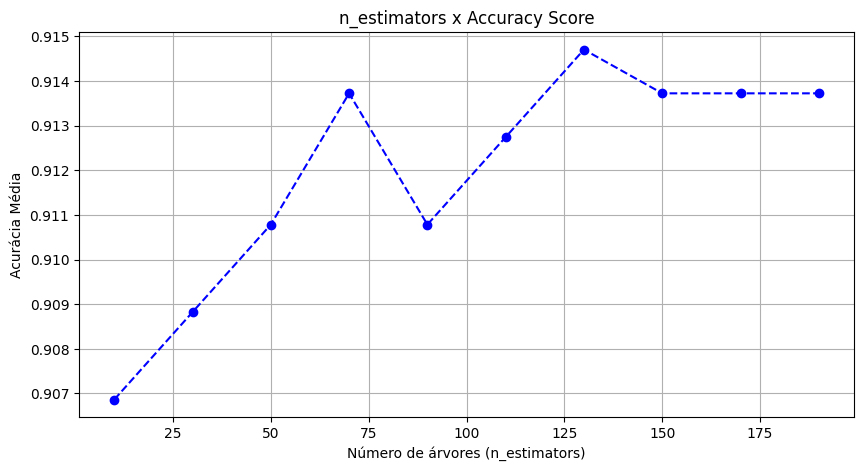

Melhor valor de n_estimators: 130
Acurácia do modelo no conjunto de teste: 0.922
Modelo salvo em 'random_forest_queen_model.pkl'


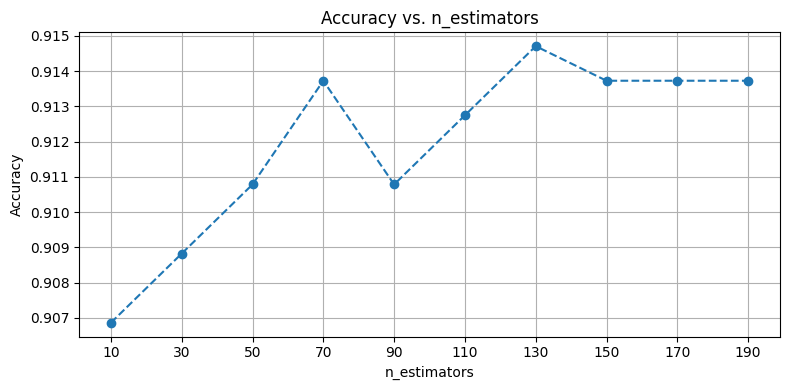

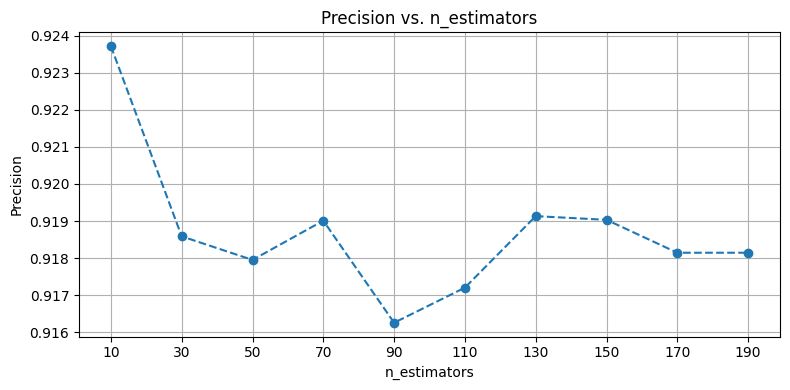

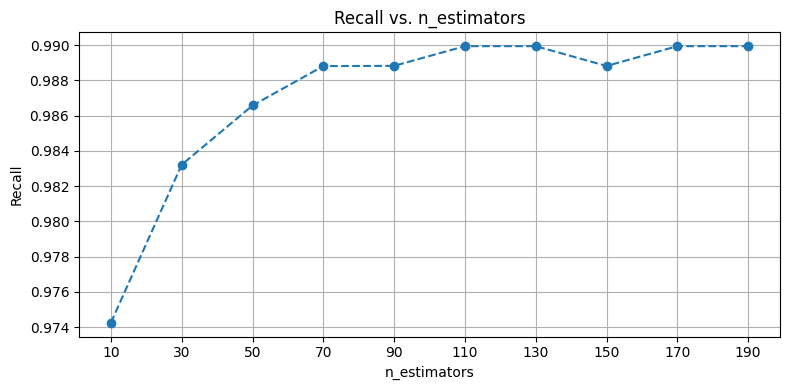

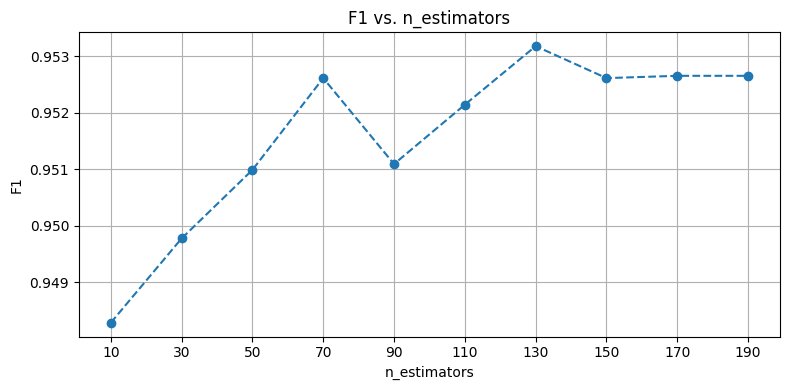

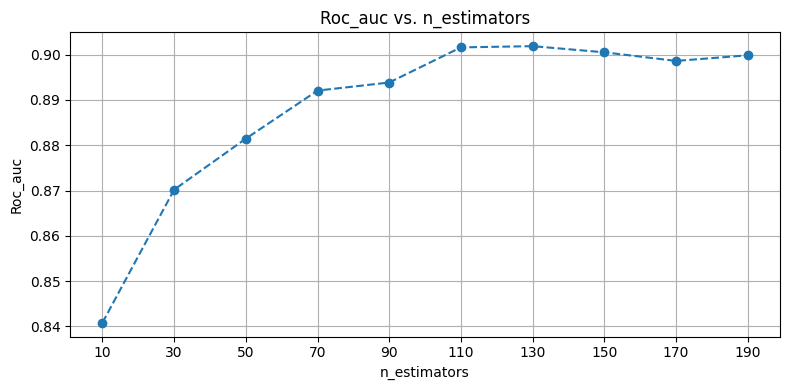

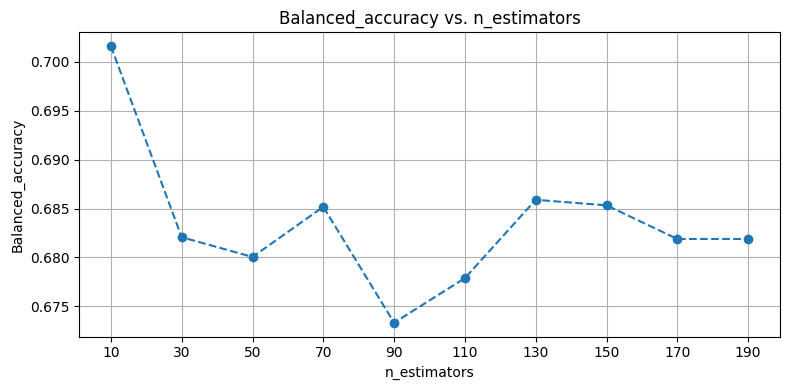

,accuracy,precision,recall,f1,roc_auc,balanced_accuracy
n_estimators,,,,,,
10,0.906863,0.923714,0.974251,0.948286,0.840808,0.701587
30,0.908824,0.918588,0.983215,0.949776,0.870189,0.682069
50,0.910784,0.917952,0.986573,0.950988,0.881459,0.680056
70,0.913725,0.919010,0.988808,0.952612,0.892071,0.685173
90,0.910784,0.916259,0.988821,0.951092,0.893857,0.673333
110,0.912745,0.917205,0.989938,0.952142,0.901616,0.677892
130,0.914706,0.919132,0.989938,0.953177,0.901884,0.685892
150,0.913725,0.919033,0.988814,0.952612,0.900526,0.685330
170,0.913725,0.918146,0.989938,0.952652,0.898627,0.681892


In [4]:
from sklearn.ensemble import RandomForestClassifier

#Avalia diferentes valores de n_estimators, para ver qual seria mais adequado para o modelo
n_estimators_values = range(10, 210, 20)
accuracy_scores = []

for n in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

plotValues('Número de árvores (n_estimators)','n_estimators x Accuracy Score', n_estimators_values, accuracy_scores, 'linear')

#Escolhe o melhor n_estimators baseado na maior acurácia
best_n = n_estimators_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de n_estimators: {best_n}")

#Cria o modelo RandomForest com o melhor n_estimators
model = RandomForestClassifier(n_estimators=best_n, random_state=42)

trainModel(model, 'random_forest_queen_model.pkl')

evaluateMetrics(model, n_estimators_values, 'n_estimators', X_train, y_train, 'linear')

#Carrega o modelo para novas previsões
#newDataPrediction('random_forest_queen_model.pkl')


In [5]:
n_estimators_values

range(10, 210, 20)

#Aplicando KNN

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor de K.

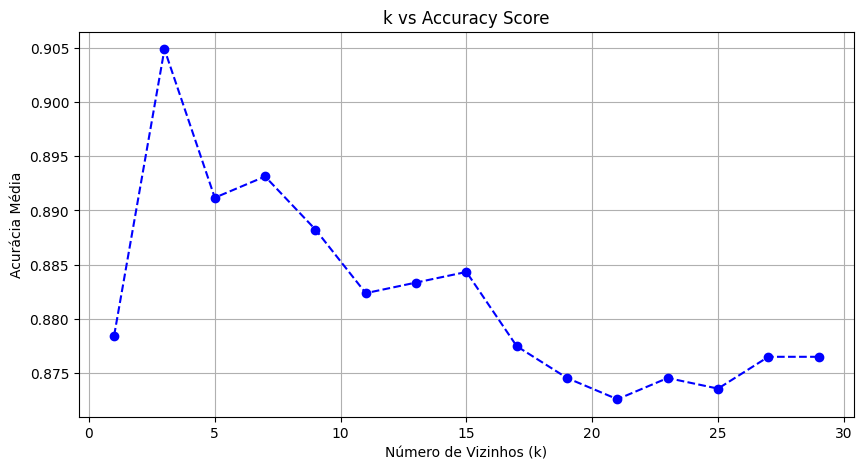

Melhor valor de k: 3
Acurácia do modelo no conjunto de teste: 0.914
Modelo salvo em 'knn_queen_model.pkl'


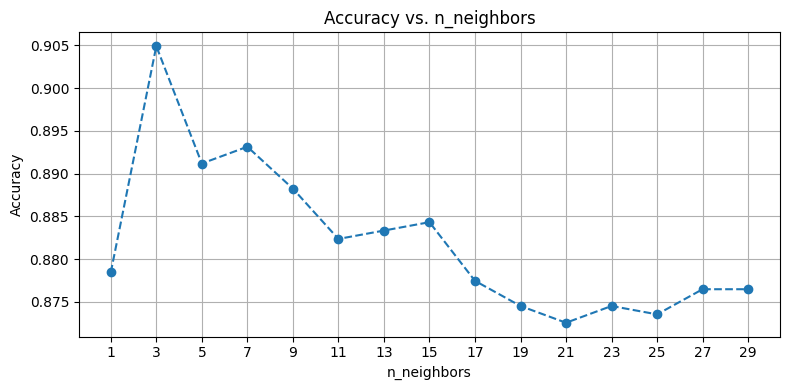

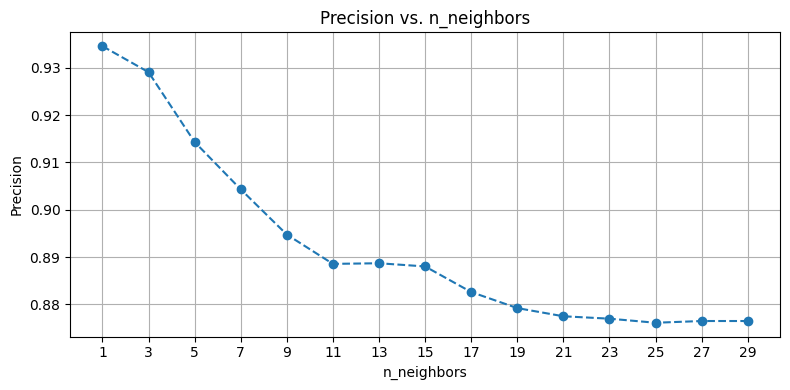

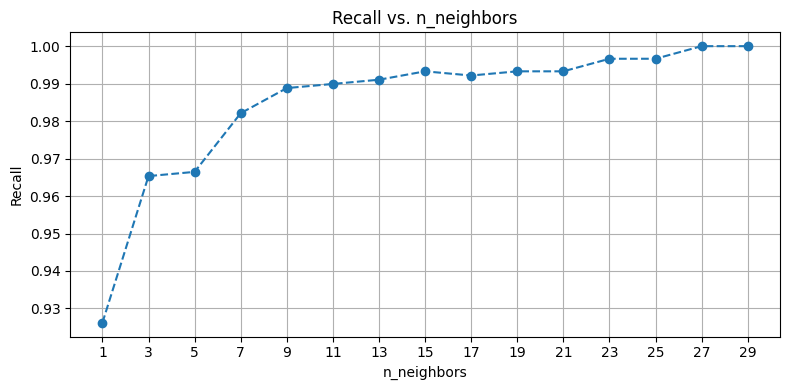

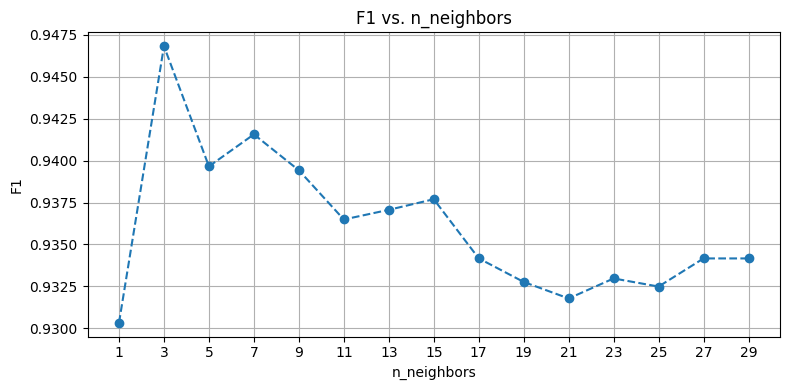

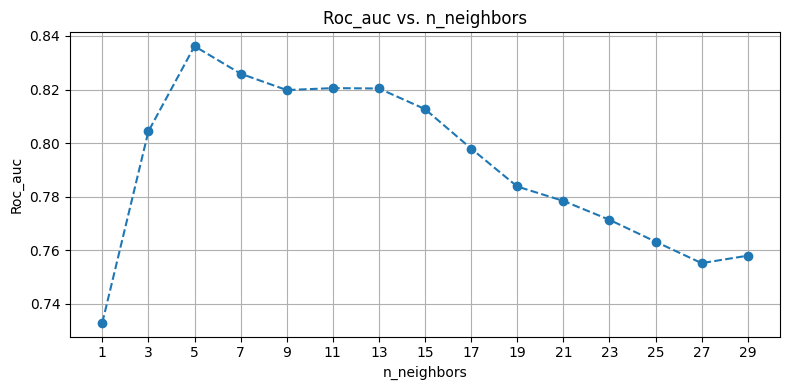

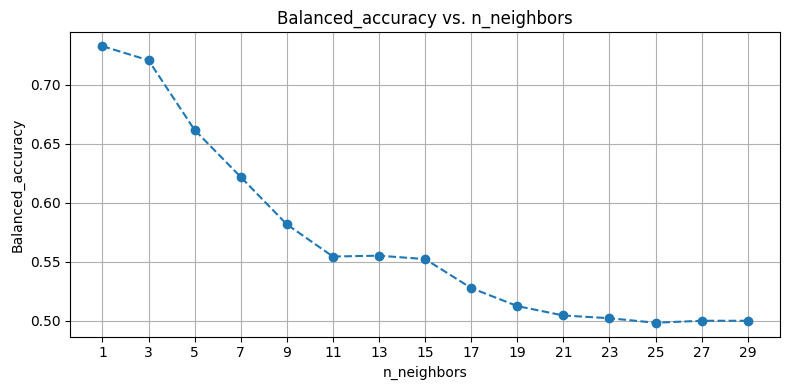

,accuracy,precision,recall,f1,roc_auc,balanced_accuracy
n_neighbors,,,,,,
1,0.878431,0.934606,0.926182,0.930335,0.732937,0.732937
3,0.904902,0.929111,0.965325,0.946820,0.804388,0.720970
5,0.891176,0.914337,0.966449,0.939654,0.836189,0.661840
7,0.893137,0.904325,0.982104,0.941563,0.825925,0.621975
9,0.888235,0.894758,0.988814,0.939420,0.819802,0.581792
11,0.882353,0.888559,0.989919,0.936489,0.820525,0.554498
13,0.883333,0.888688,0.991043,0.937065,0.820387,0.555214
15,0.884314,0.888017,0.993284,0.937697,0.812688,0.552334
17,0.877451,0.882601,0.992166,0.934172,0.797974,0.527775


In [6]:
from sklearn.neighbors import KNeighborsClassifier

#AVALIA de diferentes valores de k
k_values = range(1, 31, 2)  # Testa valores ímpares de k para evitar empates
accuracy_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

plotValues('Número de Vizinhos (k)','k vs Accuracy Score', k_values, accuracy_scores, 'linear')


# Escolhendo o melhor k baseado na maior acurácia
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de k: {best_k}")

# Criando o modelo KNN com o melhor k
model = KNeighborsClassifier(n_neighbors=best_k)

trainModel(model, 'knn_queen_model.pkl')

evaluateMetrics(model, k_values, 'n_neighbors', X_train, y_train, 'linear')

# Carregando o modelo para novas previsões

#newDataPrediction('knn_queen_model.pkl')


#SVM MODEL

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor de C.


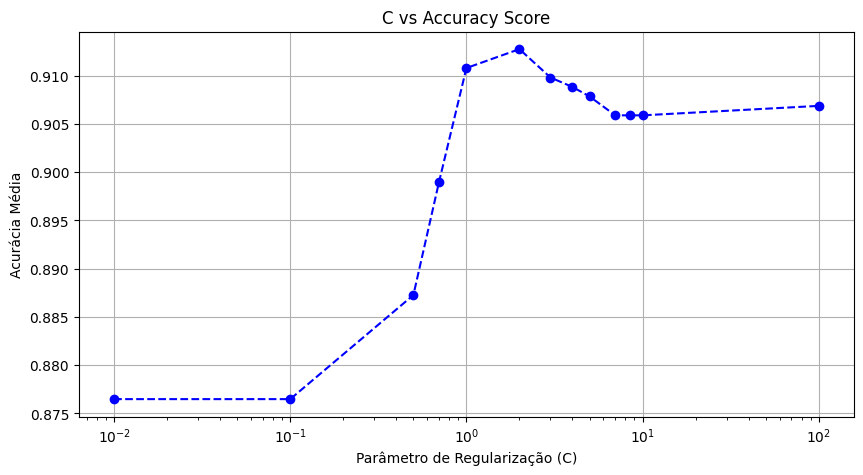

Melhor valor de C: 2
Acurácia do modelo no conjunto de teste: 0.918
Modelo salvo em 'svm_queen_model.pkl'


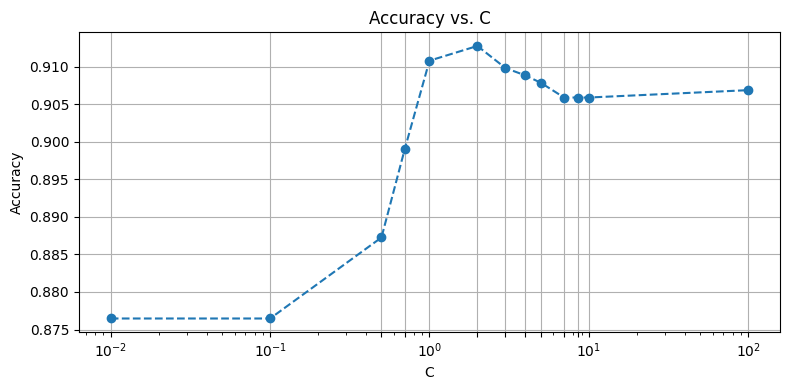

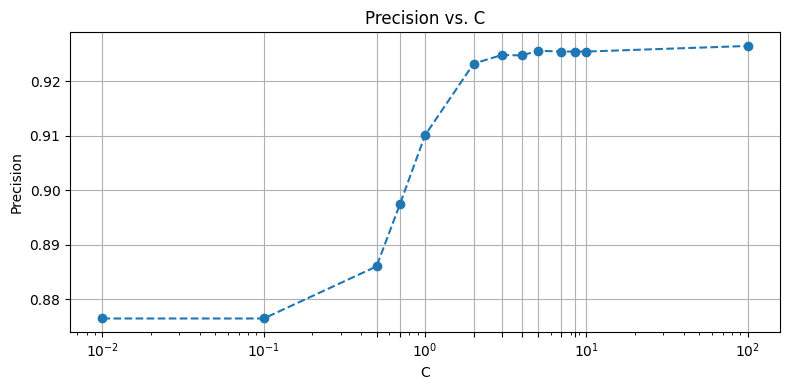

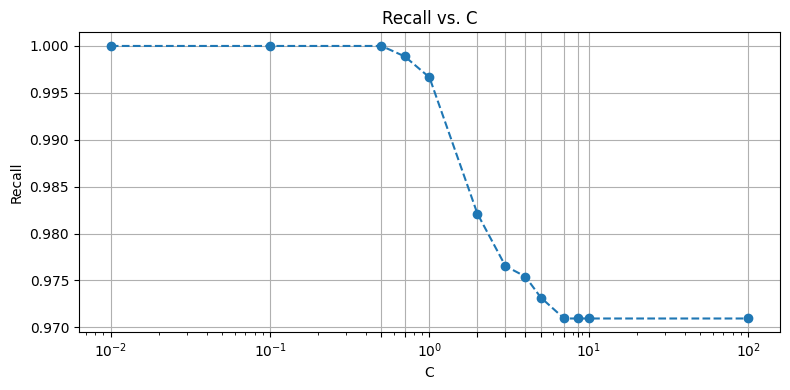

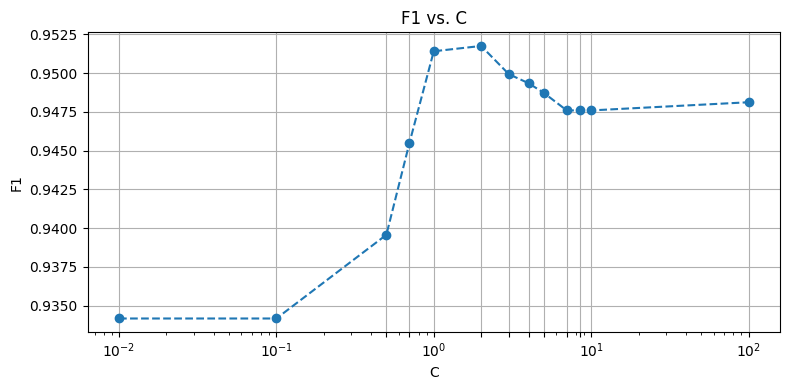

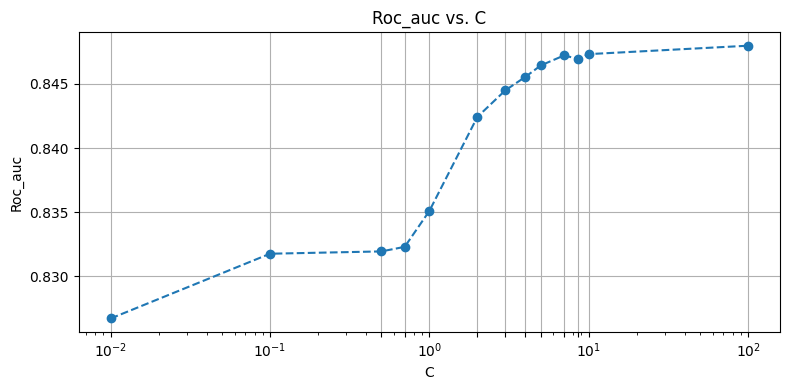

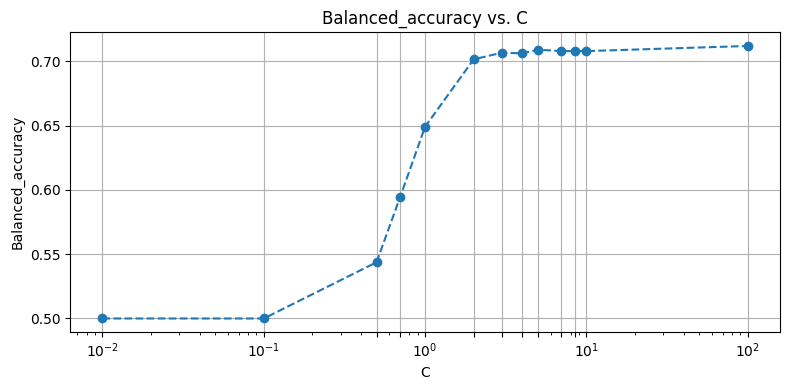

,accuracy,precision,recall,f1,roc_auc,balanced_accuracy
C,,,,,,
0.01,0.876471,0.876471,1.000000,0.934168,0.826730,0.500000
0.10,0.876471,0.876471,1.000000,0.934168,0.831773,0.500000
0.50,0.887255,0.886030,1.000000,0.939569,0.831953,0.543692
0.70,0.899020,0.897518,0.998883,0.945483,0.832309,0.594364
1.00,0.910784,0.910114,0.996648,0.951412,0.835107,0.649093
2.00,0.912745,0.923263,0.982110,0.951755,0.842425,0.701517
3.00,0.909804,0.924850,0.976524,0.949933,0.844503,0.706723
4.00,0.908824,0.924759,0.975406,0.949352,0.845542,0.706165
5.00,0.907843,0.925626,0.973172,0.948730,0.846435,0.709047


In [7]:
from sklearn.svm import SVC

# Avaliação de diferentes valores de C (parâmetro de regularização)
c_values = [0.01, 0.1, 0.5, 0.7, 1, 2, 3, 4, 5, 7, 8.5, 10, 100]
accuracy_scores = []

for c in c_values:
    model = SVC(C=c, kernel='rbf', random_state=42, gamma = 0.08)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

plotValues('Parâmetro de Regularização (C)','C vs Accuracy Score', c_values, accuracy_scores, 'log')

#Escolhe o melhor C baseado na maior acurácia
best_c = c_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de C: {best_c}")

#cRIA o modelo SVM com o melhor C
model = SVC(C=best_c, kernel='rbf', random_state=42, probability=True, gamma = 0.08) #0.08

trainModel(model, 'svm_queen_model.pkl')

evaluateMetrics(model, c_values, 'C', X_train, y_train, 'log')

#Carrega o modelo para novas previsões

#newDataPrediction('svm_queen_model.pkl')



# Modelo do Gradient Boosting

- Utilizado 80% dos dados para treino e 20% para teste
- Realizado o cross validation para encontrar melhor valor do hiperparâmetro N.

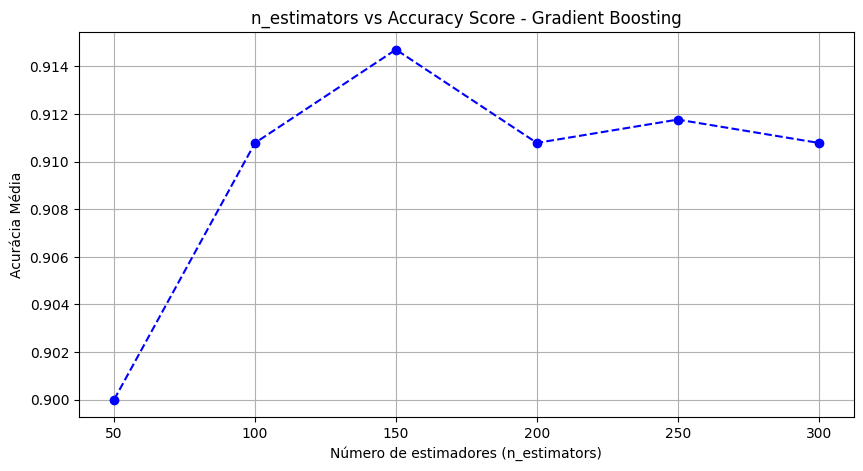

Melhor valor de n_estimators: 150
Acurácia do modelo no conjunto de teste: 0.922
Modelo salvo em 'gradient_boosting_queen_model.pkl'


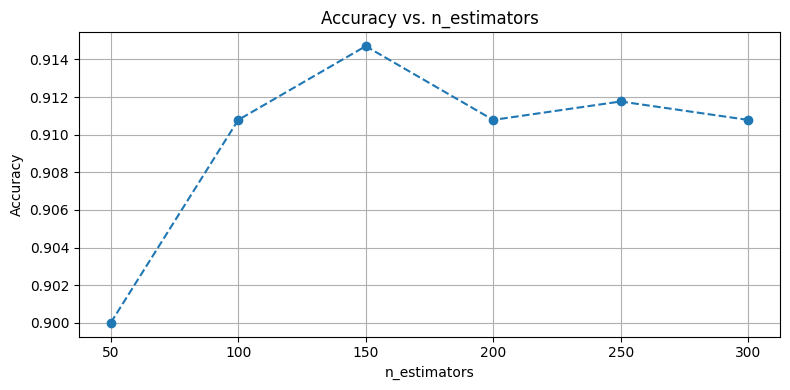

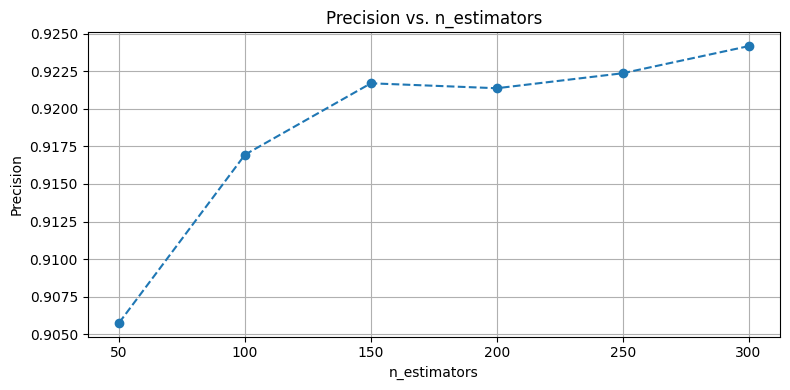

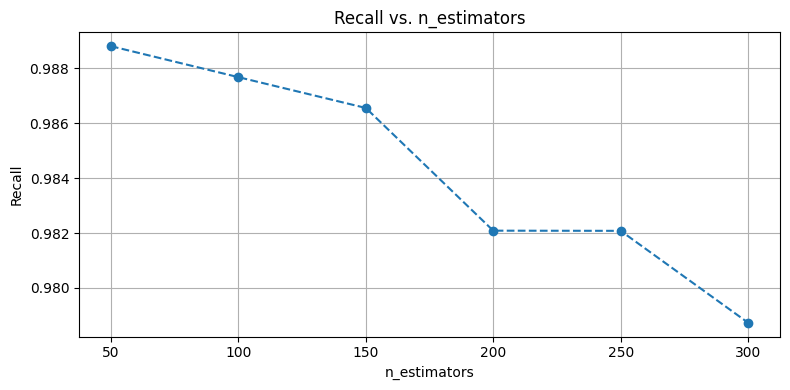

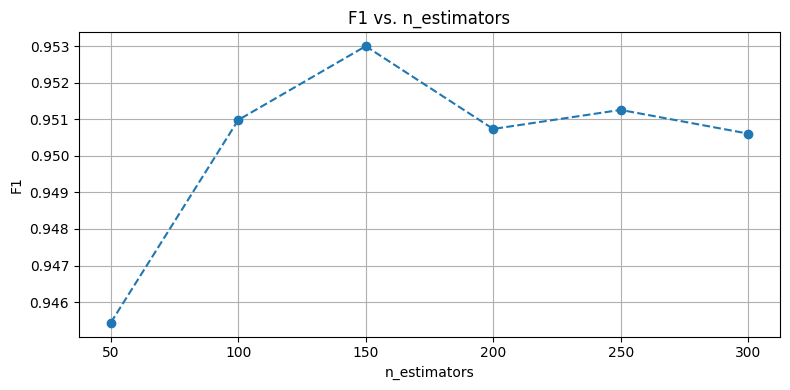

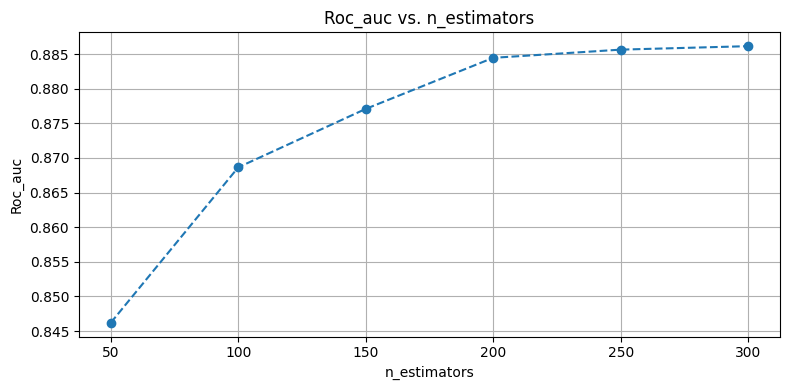

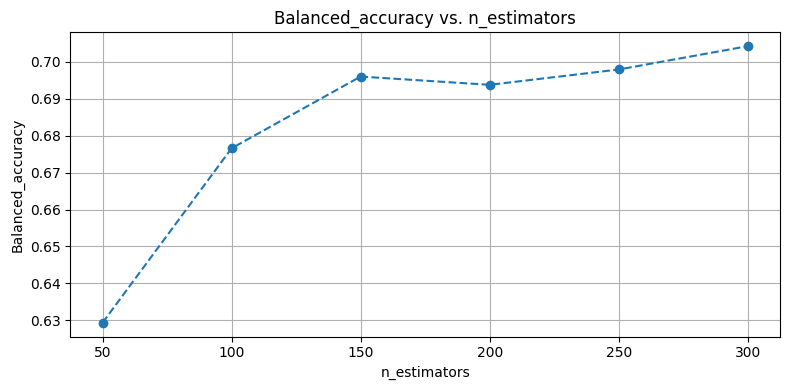

,accuracy,precision,recall,f1,roc_auc,balanced_accuracy
n_estimators,,,,,,
50,0.900000,0.905777,0.988814,0.945435,0.846201,0.629330
100,0.910784,0.916950,0.987684,0.950980,0.868639,0.676611
150,0.914706,0.921693,0.986561,0.952999,0.877076,0.696050
200,0.910784,0.921365,0.982085,0.950735,0.884450,0.693812
250,0.911765,0.922361,0.982079,0.951256,0.885633,0.697963
300,0.910784,0.924162,0.978727,0.950607,0.886135,0.704287


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Avaliação de diferentes valores de n_estimators

n_estimators_values = range(50, 310, 50)
accuracy_scores = []

for n in n_estimators_values:
    model = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    accuracy_scores.append(cv_scores.mean())

plotValues('Número de estimadores (n_estimators)','n_estimators vs Accuracy Score - Gradient Boosting',
           n_estimators_values, accuracy_scores, 'linear')

# Escolhendo o melhor n_estimators baseado na maior acurácia
best_n = n_estimators_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor valor de n_estimators: {best_n}")

# Criando o modelo Gradient Boosting com o melhor n_estimators
model = GradientBoostingClassifier(n_estimators=best_n, learning_rate=0.1, random_state=42)

trainModel(model, 'gradient_boosting_queen_model.pkl')

evaluateMetrics(model, n_estimators_values, 'n_estimators', X_train, y_train, 'linear')

# Carregando o modelo para novas previsões
#newDataPrediction('gradient_boosting_queen_model.pkl')



#Treinamento com regressão

In [9]:
df = pd.read_csv("all_data_updated_regression.csv")

def plotValuesRegressor(x, name, estimators_values, r2_scores, scale):
  plt.figure(figsize=(10, 5))
  plt.plot(estimators_values, r2_scores, marker='o', linestyle='dashed', color='g')
  plt.xlabel(f'{x}')
  plt.ylabel('R² Médio (Cross-Validation)')
  plt.title(f'{name}')
  plt.xticks(estimators_values)
  plt.xscale(f'{scale}')
  plt.grid()
  plt.show()

def trainModelRegressor(model, nameSave):
  #Treina o modelo com todos os dados de treino
  model.fit(X_train, y_train)

  # Avaliando no conjunto de teste
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  print(f"MSE no teste: {mse:.2f}")
  print(f"R² no teste: {r2:.2f}")

  #Salva o modelo treinado com o joblib
  joblib.dump(model, f'{nameSave}')
  print(f"Modelo salvo em '{nameSave}'")

def predictMissingFeatures(modelNamePressure, modelNameHumidity, input_df):
    # Carrega o modelo treinado
    loaded_model = joblib.load(modelNamePressure)
    loaded_model2 = joblib.load(modelNameHumidity)

    # Faz uma cópia do DataFrame original para preservar os dados
    df_copy = input_df.copy()

    # Define as features que o modelo espera
    features = ['hive temp',
                'weather temp', 'weather humidity', 'weather pressure']

    # Garante que só essas colunas sejam usadas na predição
    X_new = df_copy[features]

    # Faz as previsões
    predictionsPressure = loaded_model.predict(X_new)
    predictionsHumidity = loaded_model2.predict(X_new)

    # Adiciona a coluna com os valores previstos ao dataframe copiado
    df_copy['hive pressure'] = predictionsPressure
    df_copy['hive humidity'] = predictionsHumidity

    # Mostra um exemplo de previsão
    print(df_copy[['hive temp', 'weather humidity', 'weather temp', 'weather pressure',
                 'hive pressure', 'hive humidity']].head())

    return df_copy  # Retorna o DataFrame com as previsões adicionadas


#Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def RandomForest_Regressor(feature):

  # Avaliação com diferentes n_estimators
  n_estimators_values = range(10, 210, 20)
  r2_scores = []

  for n in n_estimators_values:
      model = RandomForestRegressor(n_estimators=n, random_state=42)
      scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  # Regressão usa R², não acurácia
      r2_scores.append(scores.mean())

  print("\nResultado para a feature: ", feature)
  plotValuesRegressor('Número de Árvores (n_estimators)', 'n_estimators vs R² Score',
                      n_estimators_values, r2_scores, 'linear')

  # Melhor n_estimators
  best_n = n_estimators_values[r2_scores.index(max(r2_scores))]
  print(f"Melhor n_estimators: {best_n}")

  # Treinando o modelo final
  model = RandomForestRegressor(n_estimators=best_n, random_state=42)
  trainModelRegressor(model, f'random_forest_{feature}.pkl')




#Usando KNN Regressor

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def KNN_Regressor(feature):
  # Avaliação com diferentes valores k
  k_values = range(1, 21, 2)
  r2_scores = []

  for k in k_values:
      model = KNeighborsRegressor(n_neighbors= k)
      scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')  # Regressão usa R², não acurácia
      r2_scores.append(scores.mean())

  print("\nResultado para a feature: ", feature)
  plotValuesRegressor('Número de Vizinhos (k)', 'k_estimators vs R² Score',
                      k_values, r2_scores, 'linear')

  # Escolhendo o melhor k
  best_k = k_values[r2_scores.index(max(r2_scores))]
  print(f"Melhor valor de k: {best_k}")


  # Treinando o modelo com o melhor k
  model = KNeighborsRegressor(n_neighbors=best_k)
  trainModelRegressor(model, f'knn_regressor_{feature}.pkl')


#SVR Regressor

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def SVM_Regressor(feature):

  # Padronizando os dados
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Testando diferentes valores de C
  C_values = [ 0.1, 1, 10, 100, 1000, 10000]
  r2_scores = []

  for C in C_values:
      model = SVR(kernel='rbf', C=C)
      scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
      r2_scores.append(scores.mean())

  print("\nResultado para a feature: ", feature)
  plotValuesRegressor('Valor de C', 'SVR - C vs R² Score',
                      C_values, r2_scores, 'log')

  # Melhor C
  best_C = C_values[r2_scores.index(max(r2_scores))]
  print(f"Melhor valor de C: {best_C}")

  # Treinamento e avaliação final
  model = SVR(kernel='rbf', C=best_C)

  trainModelRegressor(model, f'svm_regressor_{feature}.pkl')


#Gradient Regressor

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

def GradientBoosting_Regressor(feature):

  # Testando diferentes valores de n_estimators
  n_estimators_values = range(50, 401, 50)
  r2_scores = []

  for n in n_estimators_values:
      model = GradientBoostingRegressor(n_estimators=n, random_state=42)
      scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
      r2_scores.append(scores.mean())

  print("\nResultado para a feature: ", feature)
  plotValuesRegressor('n_estimators', 'GB - n_estimators vs R² Score',
                      n_estimators_values, r2_scores, 'linear')


  # Melhor n_estimators
  best_n = n_estimators_values[r2_scores.index(max(r2_scores))]
  print(f"Melhor n_estimators: {best_n}")

  # Treinando e avaliando
  model = GradientBoostingRegressor(n_estimators=best_n, random_state=42)

  trainModelRegressor(model, f'gradient_regressor_{feature}.pkl')


#Treinamento dos modelos Regressor


Resultado para a feature:  hive_pressure


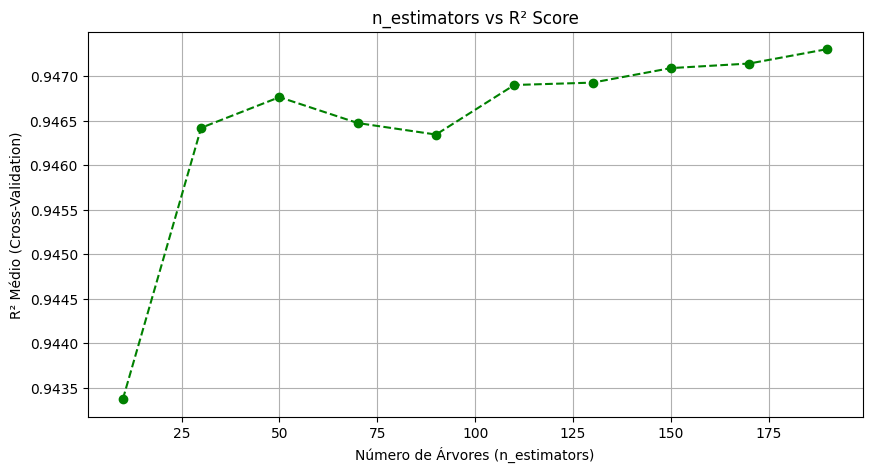

Melhor n_estimators: 190
MSE no teste: 0.29
R² no teste: 0.95
Modelo salvo em 'random_forest_hive_pressure.pkl'

Resultado para a feature:  hive_pressure


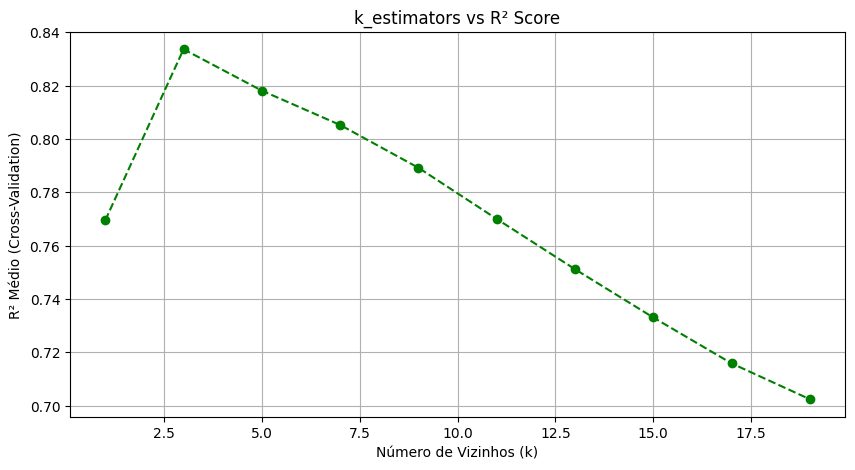

Melhor valor de k: 3
MSE no teste: 0.87
R² no teste: 0.85
Modelo salvo em 'knn_regressor_hive_pressure.pkl'

Resultado para a feature:  hive_pressure


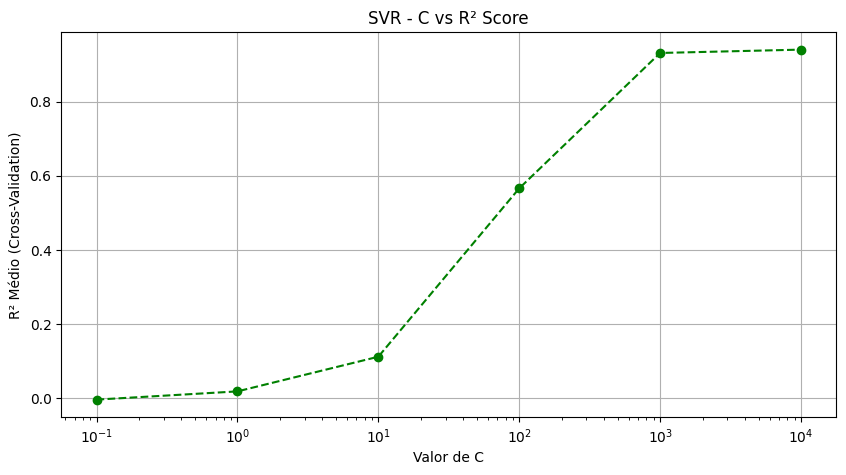

Melhor valor de C: 10000
MSE no teste: 0.40
R² no teste: 0.93
Modelo salvo em 'svm_regressor_hive_pressure.pkl'

Resultado para a feature:  hive_pressure


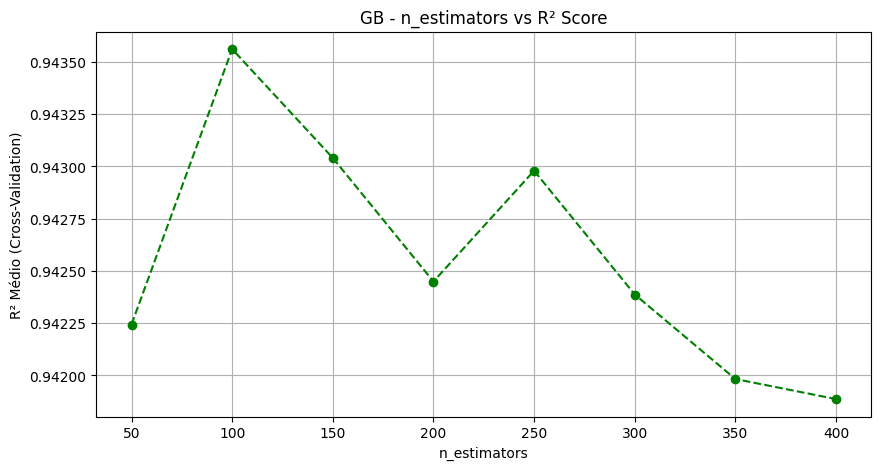

Melhor n_estimators: 100
MSE no teste: 0.34
R² no teste: 0.94
Modelo salvo em 'gradient_regressor_hive_pressure.pkl'

Resultado para a feature:  hive_humidity


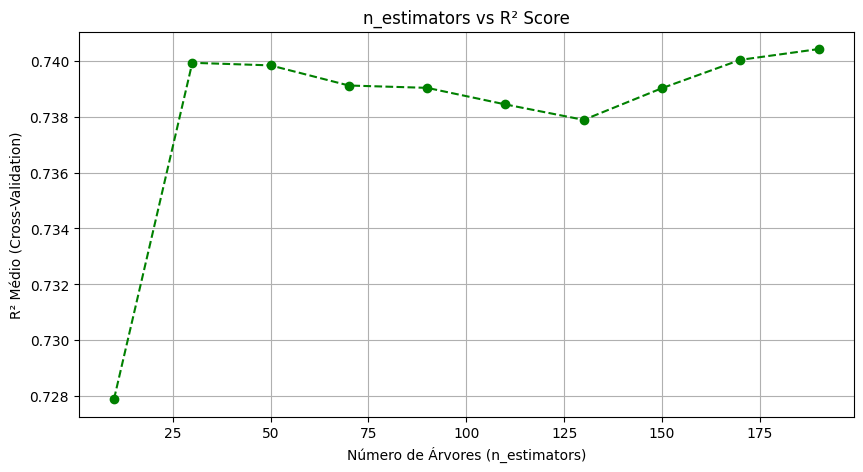

Melhor n_estimators: 190
MSE no teste: 67.46
R² no teste: 0.81
Modelo salvo em 'random_forest_hive_humidity.pkl'

Resultado para a feature:  hive_humidity


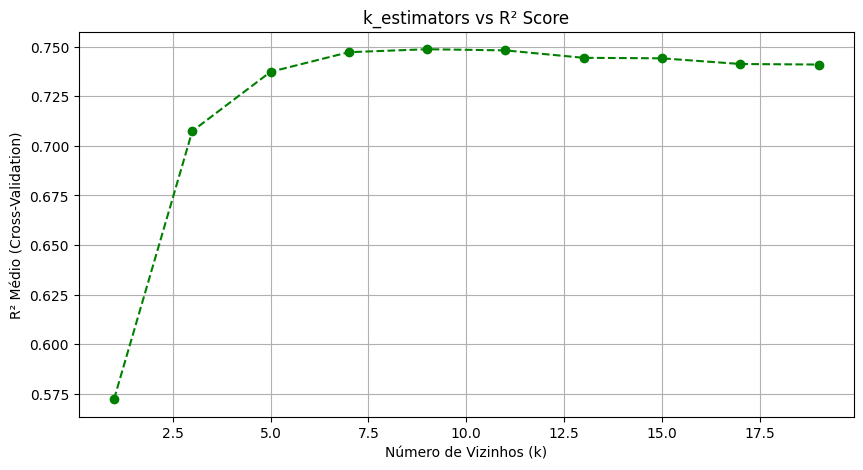

Melhor valor de k: 9
MSE no teste: 77.51
R² no teste: 0.78
Modelo salvo em 'knn_regressor_hive_humidity.pkl'

Resultado para a feature:  hive_humidity


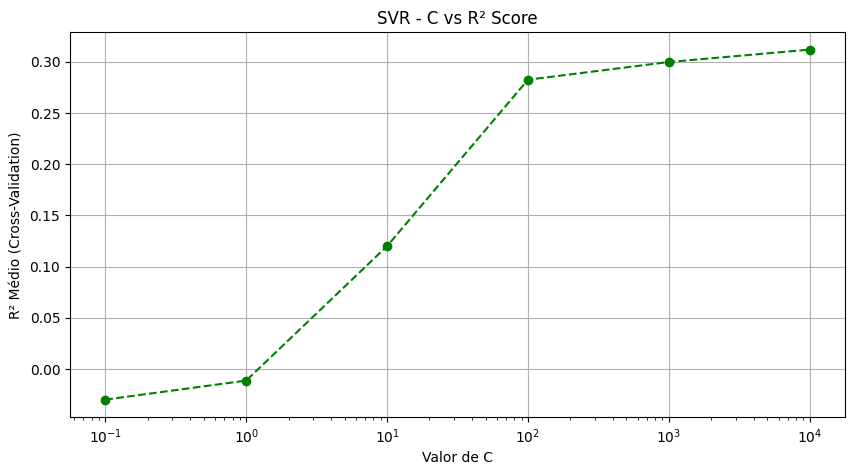

Melhor valor de C: 10000
MSE no teste: 247.24
R² no teste: 0.30
Modelo salvo em 'svm_regressor_hive_humidity.pkl'

Resultado para a feature:  hive_humidity


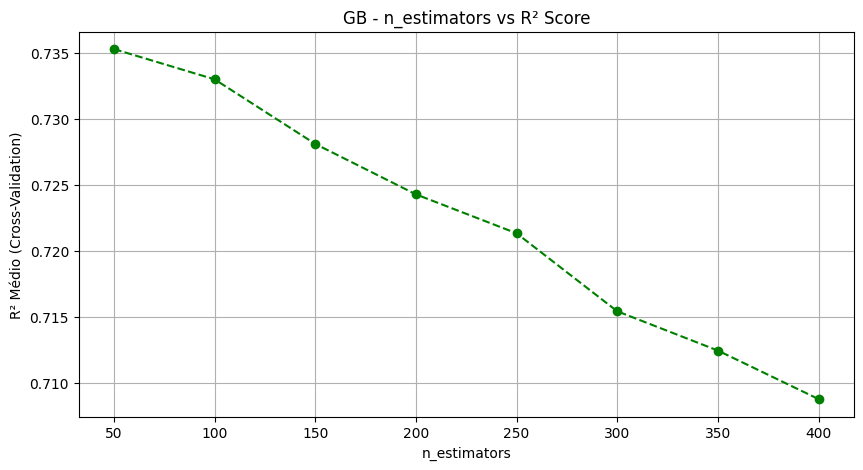

Melhor n_estimators: 50
MSE no teste: 76.80
R² no teste: 0.78
Modelo salvo em 'gradient_regressor_hive_humidity.pkl'


In [14]:
# Define as features disponíveis (excluindo a que queremos prever)
features = ['hive temp', 'weather temp', 'weather humidity',
            'weather pressure']
X = df[features]

# Target: o que queremos prever
y = df['hive pressure']

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForest_Regressor('hive_pressure')
KNN_Regressor('hive_pressure')
SVM_Regressor('hive_pressure')
GradientBoosting_Regressor('hive_pressure')


# Define as features disponíveis (excluindo a que queremos prever)
features = ['hive temp', 'weather temp', 'weather humidity',
            'weather pressure']
X = df[features]

# Target: o que queremos prever
y = df['hive humidity']

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForest_Regressor('hive_humidity')
KNN_Regressor('hive_humidity')
SVM_Regressor('hive_humidity')
GradientBoosting_Regressor('hive_humidity')




#Prevendo as features faltantes com dados sintéticos

In [15]:
input_df = pd.read_csv("/content/dadosTeste.csv")

#Será usado o RF, pois ele obteve os melhores resultados

novo_df = predictMissingFeatures("random_forest_hive_pressure.pkl",
                            "random_forest_hive_humidity.pkl", input_df)
novo_df.head()

novo_df.to_csv('dadosTeste2.csv', index=False)


   hive temp  weather humidity  weather temp  weather pressure  hive pressure  \
0   20.90000         50.386440     22.397925         996.15610    1004.463842   
1   20.90000         50.373145     22.393540         996.17920    1004.463842   
2   21.57500         50.394175     22.391030         996.19940    1004.452474   
3   22.15000         50.483805     22.396985         996.20020    1004.442316   
4   21.99375         50.439245     22.403895         996.21305    1004.445158   

   hive humidity  
0      36.210632  
1      36.210632  
2      36.485684  
3      36.685368  
4      36.577474  


#Treinando os novos dados para prever a presença da rainha

In [16]:
finalQueenSVM = newDataPrediction('svm_queen_model.pkl', novo_df)
finalQueenRF = newDataPrediction('random_forest_queen_model.pkl', novo_df)
finalQueenGB = newDataPrediction('gradient_boosting_queen_model.pkl', novo_df)
finalQueenKNN = newDataPrediction('knn_queen_model.pkl', novo_df)

#print(finalQueen[finalQueen['queen presence'] == 0].count())
#print(finalQueen[finalQueen['queen presence'] == 1].count())

#print(df[df['queen presence'] == 0].count())
#print(df[df['queen presence'] == 1].count())

#print("Predição do Random Forest: ", finalQueenRF['queen presence'].value_counts())
print(finalQueenRF['queen presence'].value_counts(normalize=True) * 100)
#print("Predição do KNN: ", finalQueenKNN['queen presence'].value_counts())
print(finalQueenKNN['queen presence'].value_counts(normalize=True) * 100)
#print("Predição do SVM: ", finalQueenSVM['queen presence'].value_counts())
print(finalQueenSVM['queen presence'].value_counts(normalize=True) * 100)
#print("Predição do Gradient Boosting: ", finalQueenGB['queen presence'].value_counts())
print(finalQueenGB['queen presence'].value_counts(normalize=True) * 100)

queen presence
1    76.409705
0    23.590295
Name: proportion, dtype: float64
queen presence
1    80.191554
0    19.808446
Name: proportion, dtype: float64
queen presence
1    99.854696
0     0.145304
Name: proportion, dtype: float64
queen presence
1    78.795975
0    21.204025
Name: proportion, dtype: float64


# Resultados dos dados sintéticos - Rainha Presente (1) | Rainha Ausente (0)
* Random Forest - 73.92% | 26.08%
* KNN - 80.18% | 19.82%
* SVM - 99.91% | 0.09%
* Gradient Boosting - 82.18% | 17.82%


#Análise

- De forma geral, os resultados apresentaram uma alta frequência na presença da rainha, o que sugere que os dados previstos para as variáveis previstas *hive humidity* e *hive pressure* no modelo de regressão linear são válidos para treinar o modelo de classificação.
- O modelo SVM claramente está com problema, pois seu desempenho generalizou em quase 100% dos casos como rainha presente. Sendo assim, o modelo pode estar sofrendo *overfitting* (superajuste) ou *underfitting* (sobreajuste). Creio que isso aconteça porque o conjunto de dados para treinar o modelo de classificação é de apenas 1280 registros. Sendo assim, na separação do hiperplano ele pode acabar encaixando demais nos pontos de treino, levando a um *overfitting* (bom desempenho nos dados de treino, mas ruim nos dados do teste).

In [17]:
print(df['queen presence'].value_counts(normalize=True) * 100)

queen presence
1    87.607843
0    12.392157
Name: proportion, dtype: float64


#Possíveis causas para os resultados:

#Random e Gradient: 92 % (91% com cross validation de 5 folds)

- Random Forest e Gradient obtiveram 93% de precisão. Isso pode ter acontecido por serem modelos baseados em árvores, robustos para dados estruturados, conseguindo desta forma uma alta precisão

- Gradient Boosting se adapta melhor a padrões complexos e com pouco ruído.

- Já o Random Forest consegue generalizar melhor dados bastante ruídosos.

# KNN e SVM: 91% (90% cross validation 5 folds) e 87% -> 91% (melhorado e 91% com cross validation 5 folds)

- O KNN obteve 91%, enquanto que o SVM 87%.

- O KNN funciona a partir da proximidade com os k-vizinhos. Sendo assim, aparentemente a distribuição dos dados tem padrões locais bem definidos, o que permite uma boa classificação por proximidade.

- Já o SVM obteve uma pontuação menor. Isto sugere que aparentemente os dados não estão linearmente separáveis da melhor forma com o hiperplano escolhido, fazendo com que o seu desempenho tenha sido inferior.

# Temos algumas possibilidades:

- Overfitting do KNN e SVM: Dado que eles se baseiam em proximidade e margens, podem estar superajustando a padrões do conjunto de treino e não captando corretamente as variações sazonais, resultando em uma acurácia menor.

- Generalização melhor do RF e GB: Como esses modelos usam múltiplas árvores, podem ter captado um padrão global mais robusto, que identifica mudanças sazonais reais.

- Sendo assim, pode-se concluir que um modelo de múltiplas árvores se adapta melhor ao dataset, enquanto que algoritmos baseados em proximidade e margens (como KNN e SVM) tendem a ter um desempenho inferior.


- Impacto das features escolhidas: **hive_temp**, **hive_humidity**,  **hive_pressure**, **weather_temp**, **weather_humidity**, **weather_pressure**.
- Foram escolhidas as features relacionadas a temperatura, umidade relativa do ar e pressão, tanto de dentro da comeia (hive) como do ambiente externo (weather).

#Analisando o peso das features em cada modelo

In [18]:
def analisaFeatures(nameArchive, model, color):
  #Carregando o modelo Random Forest e gradient boosting
  rf_model = joblib.load(f'/content/{nameArchive}')

  #Obtendo a importância das features
  feature_importances = rf_model.feature_importances_
  #Definindo os nomes das features usadas no treinamento
  features = ['hive temp', 'hive humidity', 'hive pressure',
              'weather temp',
              'weather humidity', 'weather pressure',
              #'wind speed', 'rain'
              ]

  importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
  importance_df = importance_df.sort_values(by='Importance', ascending=False)


  #Plotando
  plt.figure(figsize=(5, 3))
  plt.barh(importance_df['Feature'], importance_df['Importance'], color=f'{color}')
  plt.xlabel('Importância')
  plt.ylabel('Feature')
  plt.title(f'Importância das Features - {model} ')
  plt.gca().invert_yaxis()  # Inverte a ordem para ficar da maior para a menor
  plt.show()

  print(f'Peso das variáveis do modelo {model}\n', importance_df)

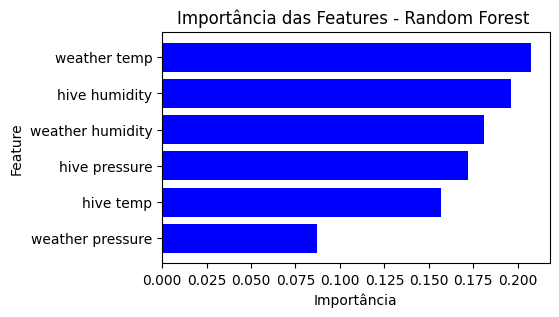

Peso das variáveis do modelo Random Forest
             Feature  Importance
3      weather temp    0.207443
1     hive humidity    0.196166
4  weather humidity    0.180816
2     hive pressure    0.171770
0         hive temp    0.156938
5  weather pressure    0.086866


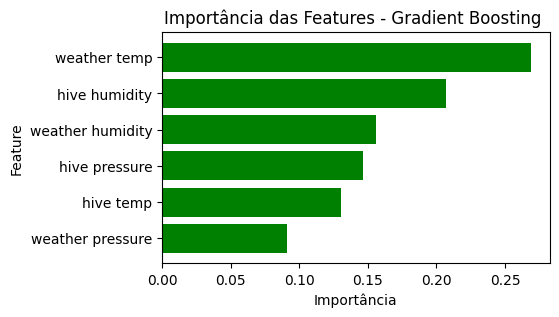

Peso das variáveis do modelo Gradient Boosting
             Feature  Importance
3      weather temp    0.268927
1     hive humidity    0.206669
4  weather humidity    0.156088
2     hive pressure    0.146702
0         hive temp    0.130682
5  weather pressure    0.090932


In [19]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

#Carregando o modelo Random Forest e gradient boosting

analisaFeatures('random_forest_queen_model.pkl', 'Random Forest', 'b')
analisaFeatures('gradient_boosting_queen_model.pkl', 'Gradient Boosting', 'g')


In [20]:
def analisaFeatures_SVM_KNN(nameArchive, nameModel, color):
  # Carregando os modelos SVM e KNN
  model = joblib.load(f'{nameArchive}')

  # Carregando o dataset
  df = pd.read_csv('all_data_updated_att.csv')  # Substitua pelo nome correto do arquivo
  features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
              'weather humidity', 'weather pressure',
              #'wind speed', 'rain'
              ]
  X = df[features]
  y = df['queen presence']

  # Calculando a importância das features para o SVM
  importance = permutation_importance(model, X, y, scoring='accuracy', random_state=42)
  feature_importances = importance.importances_mean

  # Criando DataFrame para visualização
  importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
  importance_df = importance_df.sort_values(by='Importance', ascending=False)

  #Plotando
  plt.figure(figsize=(5, 3))
  plt.barh(importance_df['Feature'], importance_df['Importance'], color=f'{color}')
  plt.xlabel('Importância')
  plt.ylabel('Feature')
  plt.title(f'Importância das Features - {nameModel} ')
  plt.gca().invert_yaxis()  # Inverte a ordem para ficar da maior para a menor
  plt.show()

  print(f'Peso das variáveis do modelo {model}\n', importance_df)

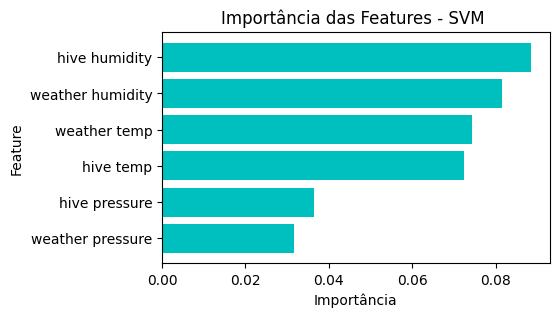

Peso das variáveis do modelo SVC(C=2, gamma=0.08, probability=True, random_state=42)
             Feature  Importance
1     hive humidity    0.088471
4  weather humidity    0.081569
3      weather temp    0.074196
0         hive temp    0.072314
2     hive pressure    0.036392
5  weather pressure    0.031529


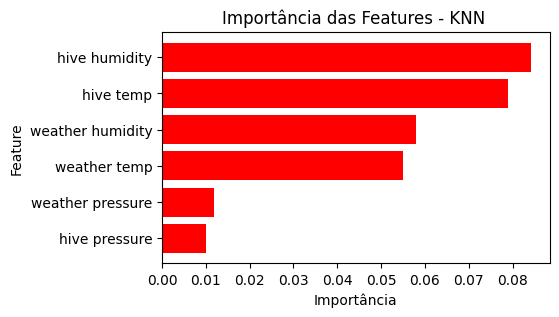

Peso das variáveis do modelo KNeighborsClassifier(n_neighbors=3)
             Feature  Importance
1     hive humidity    0.084235
0         hive temp    0.078902
4  weather humidity    0.057882
3      weather temp    0.055059
5  weather pressure    0.011922
2     hive pressure    0.010039


"\n# Carregando os modelos SVM e KNN\nsvm_model = joblib.load('svm_queen_model.pkl')\nknn_model = joblib.load('knn_queen_model.pkl')\n\n# Carregando o dataset\ndf = pd.read_csv('all_data_updated_att.csv')  # Substitua pelo nome correto do arquivo\nfeatures = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',\n            'weather humidity', 'weather pressure', 'wind speed', 'rain']\nX = df[features]\ny = df['queen presence']\n\n# Calculando a importância das features para o SVM\nsvm_importance = permutation_importance(svm_model, X, y, scoring='accuracy', random_state=42)\nsvm_feature_importances = svm_importance.importances_mean\n\n# Calculando a importância das features para o KNN\nknn_importance = permutation_importance(knn_model, X, y, scoring='accuracy', random_state=42)\nknn_feature_importances = knn_importance.importances_mean\n\n# Criando DataFrame para visualização\nimportance_df_svm = pd.DataFrame({'Feature': features, 'Importance': svm_feature_importances})\nimpo

In [21]:
from sklearn.inspection import permutation_importance
import joblib
import pandas as pd
import matplotlib.pyplot as plt

analisaFeatures_SVM_KNN('svm_queen_model.pkl', 'SVM', 'c')
analisaFeatures_SVM_KNN('knn_queen_model.pkl', 'KNN', 'r')
'''
# Carregando os modelos SVM e KNN
svm_model = joblib.load('svm_queen_model.pkl')
knn_model = joblib.load('knn_queen_model.pkl')

# Carregando o dataset
df = pd.read_csv('all_data_updated_att.csv')  # Substitua pelo nome correto do arquivo
features = ['hive temp', 'hive humidity', 'hive pressure', 'weather temp',
            'weather humidity', 'weather pressure', 'wind speed', 'rain']
X = df[features]
y = df['queen presence']

# Calculando a importância das features para o SVM
svm_importance = permutation_importance(svm_model, X, y, scoring='accuracy', random_state=42)
svm_feature_importances = svm_importance.importances_mean

# Calculando a importância das features para o KNN
knn_importance = permutation_importance(knn_model, X, y, scoring='accuracy', random_state=42)
knn_feature_importances = knn_importance.importances_mean

# Criando DataFrame para visualização
importance_df_svm = pd.DataFrame({'Feature': features, 'Importance': svm_feature_importances})
importance_df_svm = importance_df_svm.sort_values(by='Importance', ascending=False)

importance_df_knn = pd.DataFrame({'Feature': features, 'Importance': knn_feature_importances})
importance_df_knn = importance_df_knn.sort_values(by='Importance', ascending=False)

# Plotando as importâncias das features para SVM e KNN
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

#Gráfico SVM
ax[0].barh(importance_df_svm['Feature'], importance_df_svm['Importance'], color='g')
ax[0].set_xlabel('Importância')
ax[0].set_ylabel('Feature')
ax[0].set_title('Importância das Features - SVM')

#Gráfico KNN
ax[1].barh(importance_df_knn['Feature'], importance_df_knn['Importance'], color='r')
ax[1].set_xlabel('Importância')
ax[1].set_ylabel('Feature')
ax[1].set_title('Importância das Features - KNN')

# Invertendo o eixo Y para exibir a maior importância no topo
for axis in ax:
    axis.invert_yaxis()

plt.tight_layout()
plt.show()'''


#Análise:

- De forma geral, as variáveis relacionadas a temperatura e umidade relativa do ar tiveram maior impacto nos modelos treinados, sendo a temperatura externa a mais impactante nos modelos do Random Forest Classifier e Gradient Boosting. Nos modelos SVM e KNN, a umidade relativa obteve um maior peso.

- A pressão, de forma geral, teve um menor peso em todos os modelos, tanto interna como externa. A velocidade do vento também teve um peso menor.

- A presença ou não de chuva teve um peso nulo.

- Sendo assim, se quisermos aperfeiçoarmos o modelo teríamos que focar nas features relacionadas a temperatura e umidade relativa do ar, ver se seria possível normalizar ainda mais e retirar possíveis outliers.


- Algo estava errado com o modelo SVM, pois os valores do hiperparâmetro C ficavam travados em 87% no treino para diferentes valores C. Creio que o modelo estava se superajustando aos dados e ficando insensível a mudanças. Sendo assim, foi realizado a mudança do parâmetro (ou incluído, não me lembro) gamma que, para pequenos valores, como 0.001, o modelo considera padrões mais gerais, enquanto que, para altos valores, como 10, o modelo considera padrões muito locais (podendo levar a overfitting). Sendo assim, optei pelo valor meio-termo 0.1.

- Mais uma observação: agora a tabela do SVM está funcionando, embora não apresente em formato de 100% os pesos. KNN formato peso de +-30% e SVM formato peso de +-45%.


In [22]:
'''def trainModel(model, nameSave):
  #Treina o modelo com todos os dados de treino
  model.fit(X_train, y_train)

  #Faz previsões no conjunto de teste
  y_pred = model.predict(X_test)

  #Avalia o desempenho do modelo
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia do modelo no conjunto de teste: {accuracy:.2f}")

  #Salva o modelo treinado com o joblib
  joblib.dump(model, f'{nameSave}')
  print(f"Modelo salvo em '{nameSave}'")

def newDataPrediction(modelName):
  #Carrega o modelo para novas previsões
  loaded_model = joblib.load(f'{modelName}')

  #Supondo um novo conjunto de dados para teste
  new_data = pd.DataFrame({
      'hive temp': [35.0], 'hive humidity': [30.0], 'hive pressure': [1008.0],
      'weather temp': [25.0], 'weather humidity': [50.0], 'weather pressure': [1013.0],
      'wind speed': [5.0], 'rain': [0]
  })

  new_prediction = loaded_model.predict(new_data)
  print(f"Previsão para novos dados de verão (presença da rainha): {new_prediction[0]}")


  #Supondo que esteja no inverno (temperatura bem baixa aliada com uma alta umidade)
  #Nete caso a rainha estará ausente

  new_data = pd.DataFrame({
      'hive temp': [5.0], 'hive humidity': [80.0], 'hive pressure': [1008.0],
      'weather temp': [-2.0], 'weather humidity': [90.0], 'weather pressure': [1013.0],
      'wind speed': [5.0], 'rain': [0]
  })

  # Fazendo previsões com novos dados
  new_prediction = loaded_model.predict(new_data)
  print(f"Previsão para novos dados de inverno (presença da rainha): {new_prediction[0]}")
'''


'def trainModel(model, nameSave):\n  #Treina o modelo com todos os dados de treino\n  model.fit(X_train, y_train)\n\n  #Faz previsões no conjunto de teste\n  y_pred = model.predict(X_test)\n\n  #Avalia o desempenho do modelo\n  accuracy = accuracy_score(y_test, y_pred)\n  print(f"Acurácia do modelo no conjunto de teste: {accuracy:.2f}")\n\n  #Salva o modelo treinado com o joblib\n  joblib.dump(model, f\'{nameSave}\')\n  print(f"Modelo salvo em \'{nameSave}\'")\n\ndef newDataPrediction(modelName):\n  #Carrega o modelo para novas previsões\n  loaded_model = joblib.load(f\'{modelName}\')\n\n  #Supondo um novo conjunto de dados para teste\n  new_data = pd.DataFrame({\n      \'hive temp\': [35.0], \'hive humidity\': [30.0], \'hive pressure\': [1008.0],\n      \'weather temp\': [25.0], \'weather humidity\': [50.0], \'weather pressure\': [1013.0],\n      \'wind speed\': [5.0], \'rain\': [0]\n  })\n\n  new_prediction = loaded_model.predict(new_data)\n  print(f"Previsão para novos dados de verã

In [23]:
'''def evaluateMetrics(model, estimatorsValues, nameEstimator, X_train, y_train):
    # Inicializa dicionário para armazenar as métricas

  print(estimatorsValues)
  metrics_scores = {
      'accuracy': [],
      'precision': [],
      'recall': [],
      'f1': [],
      'roc_auc': [],
      'balanced_accuracy': []
  }

  # Loop pelos valores de n_estimators
  for n in estimatorsValues:
      #print(n)

      model.set_params(**{nameEstimator: n}) #desempacota um dic, sintaxe um pouco específica em python

      metrics_scores['accuracy'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean())  #remover o mean()
      metrics_scores['precision'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean())
      metrics_scores['recall'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean())
      metrics_scores['f1'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())
      metrics_scores['roc_auc'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())
      metrics_scores['balanced_accuracy'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy').mean())

  # Cria um DataFrame com os resultados
  df_resultados = pd.DataFrame(metrics_scores, index= estimatorsValues)
  df_resultados.index.name = nameEstimator

  # Exibe os resultados
  print(df_resultados)'''

"def evaluateMetrics(model, estimatorsValues, nameEstimator, X_train, y_train):\n    # Inicializa dicionário para armazenar as métricas\n\n  print(estimatorsValues)\n  metrics_scores = {\n      'accuracy': [],\n      'precision': [],\n      'recall': [],\n      'f1': [],\n      'roc_auc': [],\n      'balanced_accuracy': []\n  }\n\n  # Loop pelos valores de n_estimators\n  for n in estimatorsValues:\n      #print(n)\n\n      model.set_params(**{nameEstimator: n}) #desempacota um dic, sintaxe um pouco específica em python\n\n      metrics_scores['accuracy'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean())  #remover o mean()\n      metrics_scores['precision'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean())\n      metrics_scores['recall'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean())\n      metrics_scores['f1'].append(cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean())\n  